# Logistic Regression Model

In [1]:
#imports
import pandas as pd
from sklearn.preprocessing import LabelEncoder ,  StandardScaler, MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix , f1_score
# Install required libraries
!pip install lime shap scikit-learn numpy pandas matplotlib tensorflow pillow
# Note: After installation, restart the runtime to ensure all libraries are properly loaded.
!pip install lime
import shap
import warnings
warnings.filterwarnings("ignore")


In [2]:
train_transaction = pd.read_csv('train_transaction.csv')
train_identity = pd.read_csv('train_identity.csv')
test_transaction = pd.read_csv('test_transaction.csv')
test_identity = pd.read_csv('test_identity.csv')


In [3]:
train = train_transaction.merge(train_identity, on='TransactionID', how='left')
test = test_transaction.merge(test_identity, on='TransactionID', how='left')

In [4]:
import pandas as pd
import numpy as np

categorical_cols = train.select_dtypes(include=['object']).columns.tolist()
numerical_cols = train.select_dtypes(include=[np.number]).columns.tolist()

drop_cols = [col for col in train.columns if train[col].isnull().mean() > 0.90]
print("Dropping these columns due to too many missing values:", drop_cols)
train.drop(columns=drop_cols, inplace=True)

#Fill missing values in categorical columns with mode
for col in categorical_cols:
    if col in train.columns and train[col].isnull().sum() > 0:
        mode_val = train[col].mode()[0]
        train[col] = train[col].fillna(mode_val)

#Fill missing values in numerical columns with mean
for col in numerical_cols:
    if col in train.columns and train[col].isnull().sum() > 0:
        mean_val = train[col].mean()
        train[col] = train[col].fillna(mean_val)

#In case any values remain
train = train.fillna("unknown")

# Final check
print("Missing values after processing:")
print(train.isnull().sum().sum(), "missing values remaining.")


Dropping these columns due to too many missing values: ['dist2', 'D6', 'D7', 'D12', 'D13', 'D14', 'id_03', 'id_04', 'id_07', 'id_08', 'id_18', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27']
Missing values after processing:
0 missing values remaining.


In [5]:
categorical_cols = test.select_dtypes(include=['object']).columns.tolist()
numerical_cols = test.select_dtypes(include=[np.number]).columns.tolist()

drop_cols = [col for col in test.columns if test[col].isnull().mean() > 0.90]
print("Dropping these columns due to too many missing values:", drop_cols)
test.drop(columns=drop_cols, inplace=True)

for col in categorical_cols:
    if col in test.columns and test[col].isnull().sum() > 0:
        mode_val = test[col].mode()[0]
        test[col] = test[col].fillna(mode_val)


for col in numerical_cols:
    if col in test.columns and test[col].isnull().sum() > 0:
        mean_val = test[col].mean()
        test[col] = test[col].fillna(mean_val)


test = test.fillna("unknown")


print("Missing values after processing:")
print(test.isnull().sum().sum(), "missing values remaining.")


Dropping these columns due to too many missing values: ['dist2', 'D6', 'D7', 'D8', 'D9', 'D12', 'D13', 'D14', 'V138', 'V139', 'V140', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149', 'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157', 'V158', 'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165', 'V166', 'V322', 'V323', 'V324', 'V325', 'V326', 'V327', 'V328', 'V329', 'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338', 'V339', 'id-03', 'id-04', 'id-07', 'id-08', 'id-09', 'id-10', 'id-14', 'id-18', 'id-21', 'id-22', 'id-23', 'id-24', 'id-25', 'id-26', 'id-27', 'id-30', 'id-32', 'id-33', 'id-34']
Missing values after processing:
0 missing values remaining.


In [6]:
train.isnull().sum()

,0
TransactionID,0
isFraud,0
TransactionDT,0
TransactionAmt,0
ProductCD,0
...,...
id_36,0
id_37,0
id_38,0
DeviceType,0


In [7]:
categorical_columns1 = train.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", categorical_columns1)

Categorical Columns: Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1',
       'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'id_12', 'id_15',
       'id_16', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33', 'id_34', 'id_35',
       'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo'],
      dtype='object')


In [8]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical columns
label_encoder = LabelEncoder()
for col in categorical_columns1:
    train[col] = label_encoder.fit_transform(train[col])

target_column = 'isFraud'

numerical_columns = train.select_dtypes(include=['int64', 'float64']).columns
numerical_columns = numerical_columns.drop(target_column)

scaler = StandardScaler()
train[numerical_columns] = scaler.fit_transform(train[numerical_columns])




In [9]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,-1.731442,0,-1.711149,-0.299121,0.482608,0.871406,0.000000,-0.272421,-2.882863,-1.608472,...,-0.292032,0.000000,0.003162,0.175108,0.276457,-0.135105,0.200548,0.16228,-0.272011,0.149698
1,-1.730224,0,-1.711103,-0.447140,0.482608,-1.499028,0.368975,-0.272421,-1.073122,-2.684853,...,-0.292032,0.000000,0.003162,0.175108,0.276457,-0.135105,0.200548,0.16228,-0.272011,0.149698
2,-1.729007,0,-1.707989,-0.334720,0.482608,-1.094159,0.911965,-0.272421,0.736619,-0.962643,...,-0.292032,0.000000,0.003162,0.175108,0.276457,-0.135105,0.200548,0.16228,-0.272011,0.149698
3,-1.727789,0,-1.706615,-0.368446,0.482608,1.763900,1.398131,-0.272421,-1.073122,-2.281210,...,-0.292032,0.000000,0.003162,0.175108,0.276457,-0.135105,0.200548,0.16228,-0.272011,0.149698
4,-1.726572,0,-1.706294,-0.368446,-1.812132,-1.129384,1.063497,-0.272421,-1.073122,-2.684853,...,4.618839,3.737897,3.151540,0.175108,0.276457,-0.135105,0.200548,0.16228,3.676317,-3.386008


In [10]:
X = train.drop(columns=['isFraud', 'TransactionID', 'TransactionDT'], errors='ignore')
y = train['isFraud']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_resampling, y_train_resampling = sm.fit_resample(X_train, y_train)

In [13]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_resampling, y_train_resampling)

y_pred = logistic_model.predict(X_test)

print("Accuracy :", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

Accuracy : 0.9279437609841827

 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.94      0.96       556
           1       0.18      0.62      0.28        13

    accuracy                           0.93       569
   macro avg       0.59      0.78      0.62       569
weighted avg       0.97      0.93      0.95       569



In [14]:
f1 = f1_score(y_test, y_pred)
print(f"F1-score : {f1:.4f}")

F1-score : 0.2807


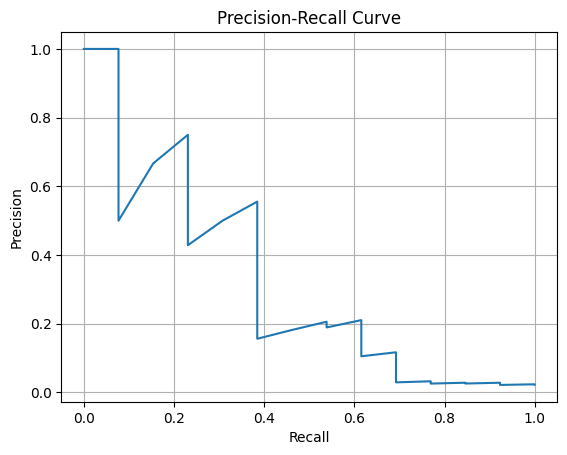

In [15]:
y_probs = logistic_model.predict_proba(X_test)[:, 1]
y_pred_adjusted = (y_probs > 0.2).astype(int)

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid(True)
plt.show()

In [16]:
X_df = pd.DataFrame(X, columns=train.columns)

In [17]:
X_train_df =  pd.DataFrame(X_train, columns=train.columns)

In [18]:
X_test.shape

(569, 413)

PDP

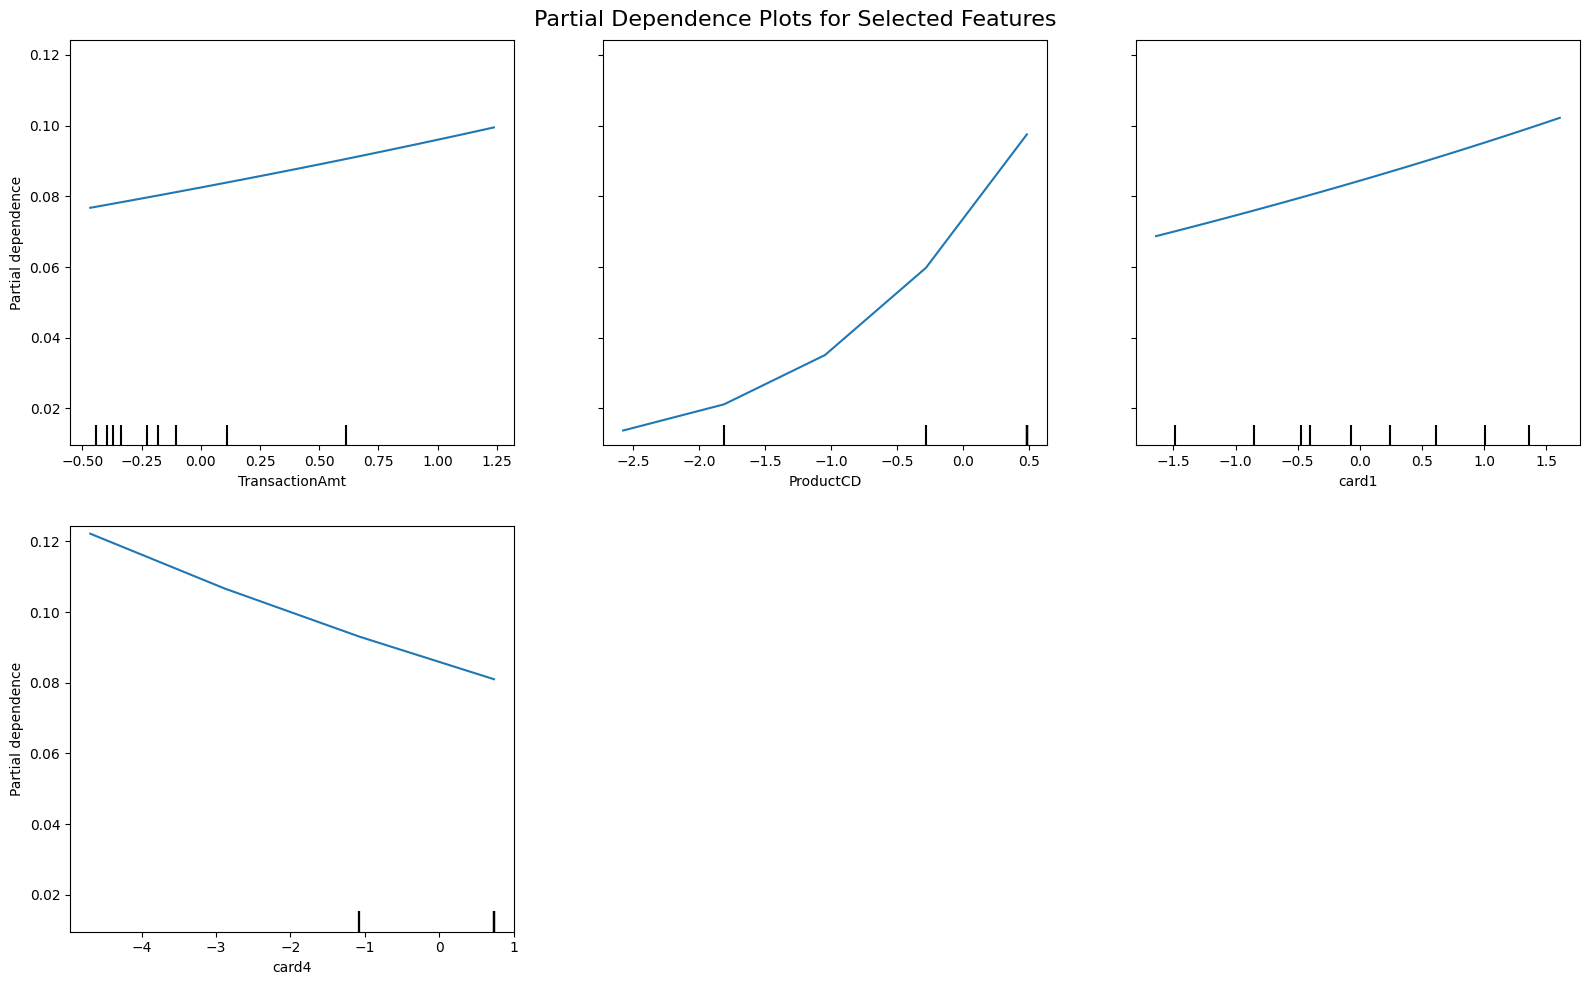

In [20]:
from sklearn.inspection import PartialDependenceDisplay

# Use PDP on Specific Features ---> feature vraiable has the idx of the required feature
feature = [0 ,1 ,2, 5 ]


target_class = y
fig, ax = plt.subplots(figsize=(16, 10))  #

PartialDependenceDisplay.from_estimator(logistic_model, X_test, features=feature, target=target_class, ax=ax)
plt.suptitle("Partial Dependence Plots for Selected Features", fontsize=16)
plt.tight_layout()
plt.show()

ICE

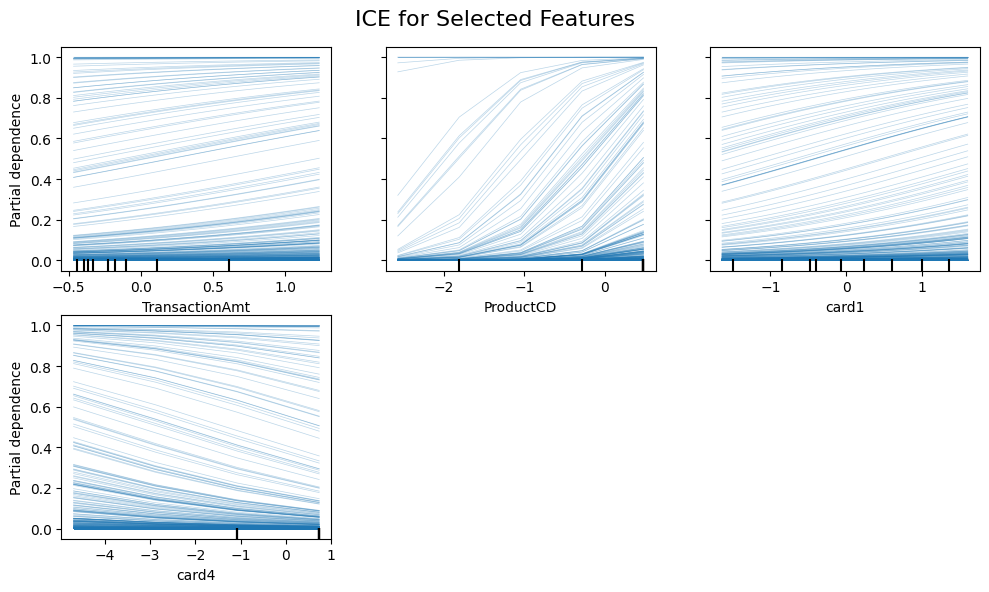

In [21]:
# ICE is included with PDP in sklearn

target_class = 1
fig, ax = plt.subplots(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(logistic_model, X_test, features=feature, target=target_class, kind='individual', n_cols=3,ax=ax)
plt.suptitle("ICE for Selected Features", fontsize=16)
plt.tight_layout()
plt.show()

PFI


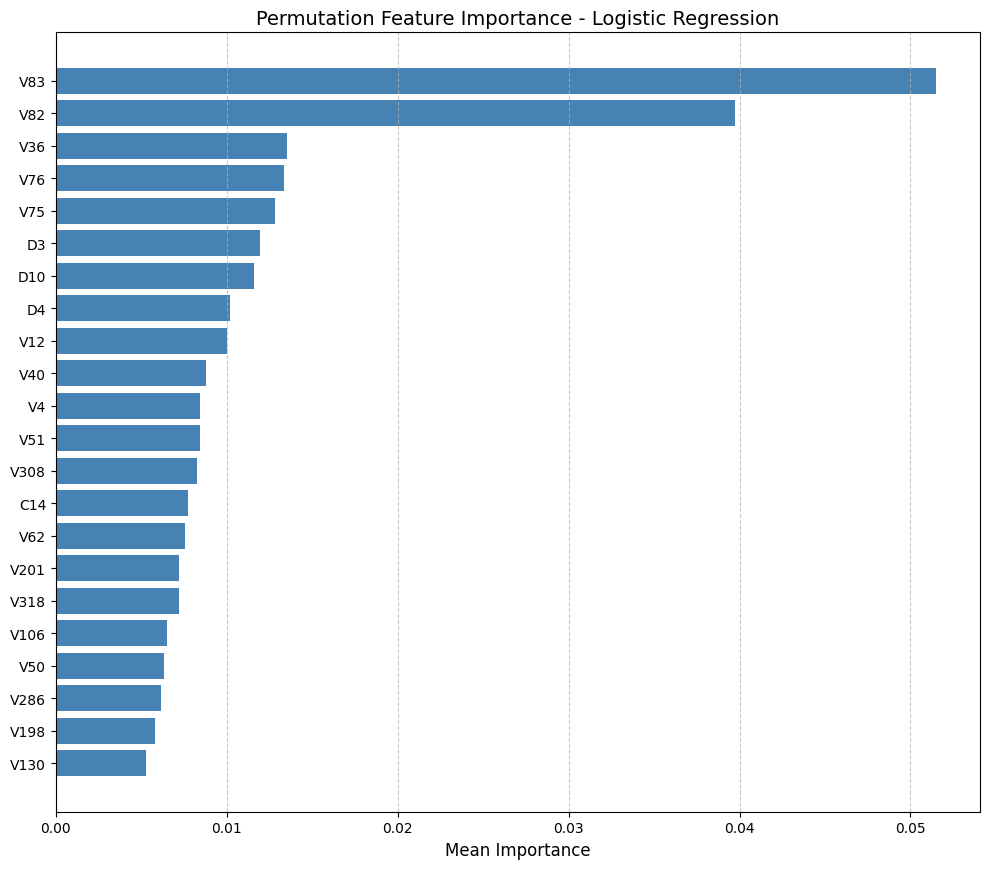

In [22]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

result = permutation_importance(logistic_model, X_test, y_test, n_repeats=10, random_state=42)


sorted_idx = result.importances_mean.argsort()
importances = result.importances_mean[sorted_idx]
features = X_test.columns[sorted_idx]

# Filter out features with near-zero importance
threshold = 0.005
mask = importances > threshold
filtered_features = features[mask]
filtered_importances = importances[mask]

# Plot
plt.figure(figsize=(10, max(6, len(filtered_features) * 0.4)))
plt.barh(filtered_features, filtered_importances, color='steelblue')
plt.xlabel("Mean Importance", fontsize=12)
plt.title("Permutation Feature Importance - Logistic Regression", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


shap


In [23]:
!pip install shap

In [24]:
import shap
explainer = shap.Explainer(logistic_model, X_train)

shap_values = explainer(X_test)




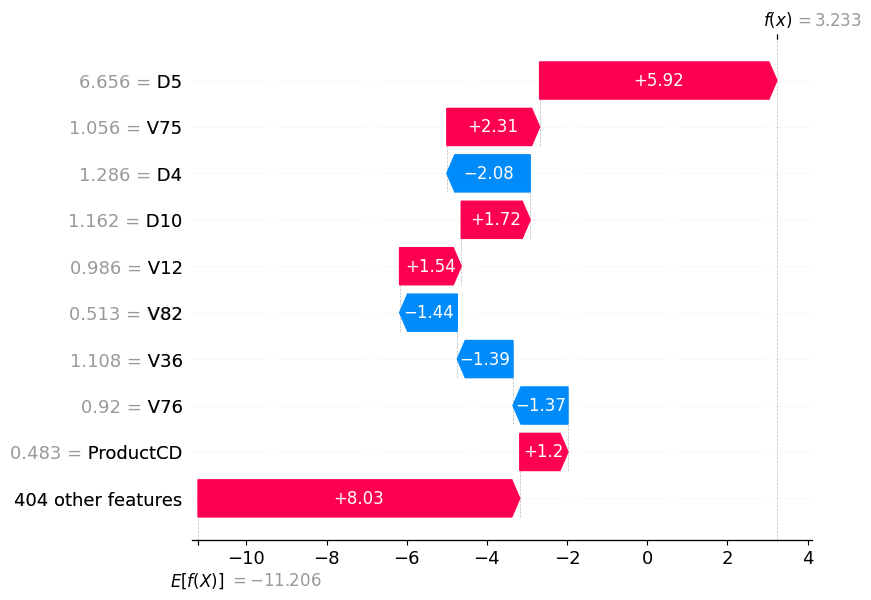

In [25]:
shap.plots.waterfall(shap_values[3])